# Programmers Skill Check Assignments 
## 채용공고추천

* Dataset 정보

```
1. train.csv  
userID : 개발자의 ID
jobID : 구직공고의 ID
applied : 지원 여부

2. job_tags.csv
jobID : 구직공고의 ID
tagID : 직업에 해당하는 키워드

3. user_tags.csv
user_ID : 개발자의 ID
tagID: 각 개발자가 관심사로 등록한 키워드

4. tags.csv 
tagID : 키워드
keyword : 키워드가 실제로 무엇을 의미하는지

5. job_companies.csv
companyID : 회사
jobID : 회사의 구직공고
companySize : 회사의 규모

6. test_job.csv 
userID : 개발자의 ID
jobID : 구직공고의 ID
```

In [5]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv("train.csv")
job_tags = pd.read_csv("job_tags.csv")
user_tags = pd.read_csv("user_tags.csv")
tags = pd.read_csv("tags.csv")
job_companies =  pd.read_csv("job_companies.csv")
test_job = pd.read_csv("test_job.csv")

## 데이터 확인

In [7]:
train.head()

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userID   6000 non-null   object
 1   jobID    6000 non-null   object
 2   applied  6000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


In [9]:
print(f"고유 아이디 수: {len(train.userID.unique())}")
print(f"고유 채용 공고 수: {len(train.jobID.unique())}")

고유 아이디 수: 196
고유 채용 공고 수: 708


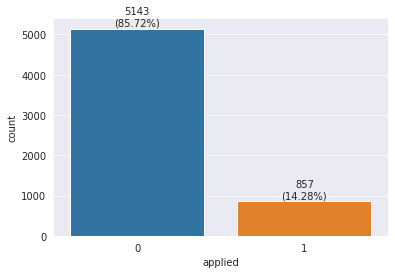

In [10]:
sns.countplot(train["applied"])
object_cnt = train["applied"].value_counts()
for x,y,z in zip(object_cnt.index, object_cnt.values, object_cnt.values/object_cnt.sum()*100):
    plt.annotate(f"{y}\n({round(z,2)}%)", xy=(x,y+70), textcoords="data", ha="center")

* 학습 데이터는 6천개가 있으며, 고유 아이디 수는 196개, 채용 공고는 708개가 있다.
* 지원하지 않는 경우가 전체 데이터의 약 85%를 차지하고 있다.

In [11]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tagID    887 non-null    object
 1   keyword  887 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [12]:
job_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   companyID    733 non-null    object
 1   jobID        733 non-null    object
 2   companySize  643 non-null    object
dtypes: object(3)
memory usage: 17.3+ KB


In [13]:
job_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   jobID   3477 non-null   object
 1   tagID   3477 non-null   object
dtypes: object(2)
memory usage: 54.5+ KB


* 유저 별 지원한(applied=1) 채용공고 리스트 추출

In [14]:
user_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17194 entries, 0 to 17193
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userID  17194 non-null  object
 1   tagID   17194 non-null  object
dtypes: object(2)
memory usage: 268.8+ KB


* job_company의 companySize를 제외하고 결측치 없음

* userID와 jobID 변환 : 아이디가 너무 길어서 보기 힘드므로 짧게 변환

In [15]:
user_ids = pd.Series(["user_"+str(x+1) for x in range(len(train["userID"].unique()))])
user_ids.index = train["userID"].unique()
user_id_dict = user_ids.to_dict()
str(user_id_dict)[:300]

"{'fe292163d06253b716e9a0099b42031d': 'user_1', '6377fa90618fae77571e8dc90d98d409': 'user_2', '8ec0888a5b04139be0dfe942c7eb4199': 'user_3', 'f862b39f767d3a1991bdeb2ea1401c9c': 'user_4', 'cac14930c65d72c16efac2c51a6b7f71': 'user_5', 'ed1ca6971578b1da0e4ad55b48d77fda': 'user_6', '8109c2c482264f96f8ac69"

In [16]:
job_ids = pd.Series(["job_"+str(x+1) for x in range(len(job_tags["jobID"].unique()))])
job_ids.index = job_tags["jobID"].unique()
job_id_dict = job_ids.to_dict()
str(job_id_dict)[:300]

"{'320722549d1751cf3f247855f937b982': 'job_1', 'e744f91c29ec99f0e662c9177946c627': 'job_2', 'e820a45f1dfc7b95282d10b6087e11c0': 'job_3', '53c3bce66e43be4f209556518c2fcb54': 'job_4', 'fd06b8ea02fe5b1c2496fe1700e9d16c': 'job_5', '6e7d2da6d3953058db75714ac400b584': 'job_6', '818f4654ed39a1c147d1e51a00ff"

In [17]:
train["userID"].replace(user_id_dict, inplace=True)
train["jobID"].replace(job_id_dict, inplace=True)
job_tags["jobID"].replace(job_id_dict, inplace=True)
user_tags["userID"].replace(user_id_dict, inplace=True)
job_companies["jobID"].replace(job_id_dict, inplace=True)
test_job["userID"].replace(user_id_dict, inplace=True)
test_job["jobID"].replace(job_id_dict, inplace=True)

In [23]:
train.head()

,userID,jobID,applied
0,user_1,job_372,0
1,user_2,job_458,0
2,user_3,job_527,1
3,user_4,job_316,0
4,user_5,job_49,0


In [24]:
def applied_job_list(x):
    return x.loc[x["applied"]==1, "jobID"].tolist()

In [25]:
applied_list = train.groupby(["userID"])[["userID","jobID", "applied"]].apply(lambda x: applied_job_list(x))
applied_list

userID
user_1      [job_357, job_378, job_171, job_122, job_155, ...
user_10                   [job_416, job_300, job_27, job_111]
user_100    [job_379, job_393, job_462, job_350, job_206, ...
user_101                 [job_126, job_370, job_353, job_713]
user_102    [job_67, job_158, job_502, job_638, job_649, j...
                                  ...                        
user_95         [job_371, job_717, job_517, job_461, job_125]
user_96                                    [job_534, job_725]
user_97     [job_305, job_718, job_716, job_29, job_208, j...
user_98     [job_384, job_71, job_379, job_54, job_514, jo...
user_99     [job_432, job_134, job_378, job_110, job_152, ...
Length: 196, dtype: object

* 유저들이 가장 많이 지원한 10개의 공고 확인

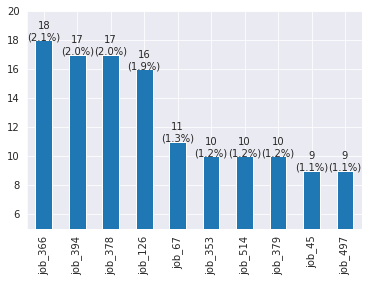

In [29]:
applied_sum = train[train["applied"]==1].count()[0] # 지원한 전체 공고 수

train.loc[train["applied"]==1, "jobID"].value_counts()[:10].plot(kind="bar", ylim=[5,20])

object_cnt = train.loc[train["applied"]==1, "jobID"].value_counts()[:10]
for x,y,z in zip(range(10), object_cnt.values, object_cnt.values/applied_sum*100):
    plt.annotate(f"{y}\n({round(z,1)}%)", xy=(x,y), textcoords="data", ha="center")

가장 많이 지원한 곳은 366번 공고이며 18명의 지원자가 있음




In [39]:
train.loc[train["applied"]==1, "jobID"].value_counts()[:10].keys()

Index(['job_366', 'job_394', 'job_378', 'job_126', 'job_67', 'job_353',
       'job_514', 'job_379', 'job_45', 'job_497'],
      dtype='object')

In [41]:
job_companies[job_companies["jobID"].isin(['job_366', 'job_394', 'job_378', 'job_126', 'job_67', 'job_353',
       'job_514', 'job_379', 'job_45', 'job_497'])]

,companyID,jobID,companySize
27,0d7de1aca9299fe63f3e0041f02638a3,job_353,NaN
40,68053af2923e00204c3ca7c6a3150cf7,job_379,11-50
126,285ab9448d2751ee57ece7f762c39095,job_366,101-200
132,539fd53b59e3bb12d203f45a912eeaf2,job_378,101-200
140,aff1621254f7c1be92f64550478c56e6,job_394,201-500
206,a8c88a0055f636e4a163a5e3d16adab7,job_45,1-10
310,285ab9448d2751ee57ece7f762c39095,job_67,101-200
341,5fd0b37cd7dbbb00f97ba6ce92bf5add,job_126,NaN
377,621bf66ddb7c962aa0d22ac97d69b793,job_497,51-100
478,285ab9448d2751ee57ece7f762c39095,job_514,101-200


* 태그 변환

In [42]:
tags.index = tags["tagID"]
tags_to_dict = tags["keyword"].to_dict()
str(tags_to_dict)

"{'602d1305678a8d5fdb372271e980da6a': 'Amazon Web Services(AWS)', 'e3251075554389fe91d17a794861d47b': 'Tensorflow', 'a1d50185e7426cbb0acad1e6ca74b9aa': 'Docker', '884d79963bd8bc0ae9b13a1aa71add73': 'Git', '4122cb13c7a474c1976c9706ae36521d': 'Python', '6e7d2da6d3953058db75714ac400b584': 'Go', '208e43f0e45c4c78cafadb83d2888cb6': 'Deep Learning', 'fe2d010308a6b3799a3d9c728ee74244': 'Machine Learning', '42d6c7d61481d1c21bd1635f59edae05': 'JSP', '97416ac0f58056947e2eb5d5d253d4f2': 'Framework7', '0e095e054ee94774d6a496099eb1cf6a': 'JavaScript', '6ecbdd6ec859d284dc13885a37ce8d81': 'CAD', '6d3a1e06d6a06349436bc054313b648c': 'Qt', 'bb04af0f7ecaee4aae62035497da1387': 'C++', 'e702e51da2c0f5be4dd354bb3e295d37': 'C', 'f47330643ae134ca204bf6b2481fec47': 'Java', '109d2dd3608f669ca17920c511c2a41e': 'D3.js', '81dc9bdb52d04dc20036dbd8313ed055': 'ReactJS', '801c14f07f9724229175b8ef8b4585a8': 'CSS', '7d771e0e8f3633ab54856925ecdefc5d': 'HTML', '8a3363abe792db2d8761d6403605aeb7': 'Django', 'da11e8cd1811acb7

In [43]:
user_tags["tagID"].replace(tags_to_dict, inplace=True)
user_tags

,userID,tagID
0,user_72,JUnit
1,user_72,Spring
2,user_72,WebSocket
3,user_72,Spring Boot
4,user_72,JavaScript
...,...,...
17189,user_164,CSS
17190,user_164,HTML5
17191,user_164,Java
17192,user_52,ExpressJS


In [44]:
temp = user_tags.groupby(["tagID"])["tagID"].count()
user_tags_grouped_df = pd.DataFrame({"tag":temp.index, "count":temp})
user_tags_grouped_df.reset_index(drop=True, inplace=True)

In [45]:
other_row = pd.DataFrame({"tag":['others'],
              "count": [user_tags_grouped_df.sort_values(by="count")["count"].iloc[:-10].sum()]})
user_tags_grouped_df = pd.concat([user_tags_grouped_df, other_row], axis=0, ignore_index=True)
user_tags_grouped_df.sort_values(by="count", ascending=False).iloc[:11]

,tag,count
345,others,11909
159,Java,820
163,JavaScript,796
204,MySQL,701
279,Spring,564
217,Node.js,516
34,Android,398
334,jQuery,385
142,HTML,381
251,ReactJS,380


* 가장 많이 선택된 상위 10개의 태그 + others
* 풀스택 관련 언어가 상위 10위를 차지하고 있다.


In [46]:
job_tags["tagID"].replace(tags_to_dict, inplace=True)
job_tags

,jobID,tagID
0,job_1,Ruby
1,job_2,Node.js
2,job_2,JavaScript
3,job_3,HTML
4,job_3,Vue.js
...,...,...
3472,job_710,C++
3473,job_711,Swift
3474,job_711,Realm
3475,job_711,Firebase


In [47]:
temp = job_tags.groupby(["tagID"])["tagID"].count()
job_tags_grouped_df = pd.DataFrame({"tag":temp.index, "count":temp})
job_tags_grouped_df.reset_index(drop=True, inplace=True)

other_row = pd.DataFrame({"tag":['others'],
              "count": [job_tags_grouped_df.sort_values(by="count")["count"].iloc[:-15].sum()]})
job_tags_grouped_df = pd.concat([job_tags_grouped_df, other_row], axis=0, ignore_index=True)
job_tags_grouped_df.sort_values(by="count", ascending=False).iloc[:16]

,tag,count
240,others,1727
114,JavaScript,219
113,Java,197
170,Python,187
150,Node.js,153
141,MySQL,143
177,ReactJS,131
102,HTML,115
52,CSS,114
88,Git,103


* 구직공고에서 원하는 기술도 대부분 풀스택 기술인 것으로 보인다.

In [48]:
job_tag_list = job_tags.groupby(["jobID"])[["jobID","tagID"]].apply(lambda x: x["tagID"].tolist())
job_tag_list = job_tag_list.rename("job_tagIDs")
job_tag_list

jobID
job_1                                  [Ruby, Ruby on Rails]
job_10                 [CSS, JavaScript, React Native, HTML]
job_100            [jQuery, Spring, JavaScript, MySQL, Java]
job_101    [Java, JavaScript, CSS, Vue.js, Spring, HTML, ...
job_102                            [Kotlin, Android, RxJava]
                                 ...                        
job_95                               [Linux, Python, Docker]
job_96               [NoSQL, Node.js, CI/CD, Git, PHP, Java]
job_97     [ReactJS, Node.js, JavaScript, React Native, C...
job_98              [HTML, ReactJS, JavaScript, CSS, Vue.js]
job_99      [TypeScript, GatsbyJS, AWS S3, ReactJS, GraphQL]
Name: job_tagIDs, Length: 733, dtype: object

In [49]:
user_tag_list = user_tags.groupby(["userID"])[["userID","tagID"]].apply(lambda x: x["tagID"].tolist())
user_tag_list = user_tag_list.rename("user_tagIDs")
user_tag_list

userID
user_1      [MongoDB, Docker, Java, Jenkins, ExpressJS, Op...
user_10     [Spring Boot, Arduino, PostgreSQL, Unity, Spri...
user_100    [CSS, MongoDB, Pandas, Socket.IO, Django, HTML...
user_101    [JavaScript, Java, JavaScript, Java, Jenkins, ...
user_102    [Android, GitLab, MQTT, Git, SQLite, Raspberry...
                                  ...                        
user_95     [JavaScript, JavaScript, JavaScript, JavaScrip...
user_96     [Git, MSSQL(Microsoft SQL Server), JIRA, Oracl...
user_97     [MySQL, C, Lisp, Python, Lisp, Python, Linux, ...
user_98     [CSS3, CSS3, HTML5, JavaScript, HTML5, HTML5, ...
user_99     [OpenCV, MyBatis, Arduino, MySQL, Java, Blueto...
Name: user_tagIDs, Length: 196, dtype: object

In [50]:
str(user_tag_list[5])

"['Node.js', 'C++', 'Discord.js', 'PostgreSQL', 'MFC', 'NestJS', 'Python', 'Firebase', 'Redis', 'JavaScript', 'Node.js', 'C++', 'Discord.js', 'NestJS', 'Python', 'Firebase', 'Redis', 'JavaScript', 'Node.js', 'C++', 'Discord.js', 'PostgreSQL', 'MFC', 'PostgreSQL', 'MFC', 'Redis', 'JavaScript', 'NestJS', 'Python', 'Firebase', 'PostgreSQL', 'MFC', 'Node.js', 'C++', 'Discord.js', 'Redis', 'JavaScript', 'PostgreSQL', 'MFC', 'Node.js', 'C++', 'Discord.js', 'Redis', 'JavaScript', 'NestJS', 'Python', 'Firebase', 'NestJS', 'Python', 'Firebase']"

* 한 유저에 중복된 태그가 존재 - set으로 중복 제거

In [51]:
user_tag_df = pd.DataFrame({"tags": user_tag_list})
user_tag_df["tags"] = user_tag_df["tags"].apply(lambda x: list(set(x)))
user_tag_df

,tags
userID,
user_1,"[Linux, Docker, SQLite, Machine Learning, Expr..."
user_10,"[Unity, Spring Data JPA, T map API, C#, Spring..."
user_100,"[HTML5, Android, ExpressJS, JavaScript, CSS, P..."
user_101,"[Spring, Docker, JavaScript, Java, Jenkins]"
user_102,"[Spring Data JPA, Spring, Git, centOS, Oracle ..."
...,...
user_95,[JavaScript]
user_96,"[Oracle, Git, MSSQL(Microsoft SQL Server), MyB..."
user_97,"[C++, Linux, C#, Python, MySQL, Lisp, Java, C,..."


In [52]:
job_tag_df = pd.DataFrame({"tags": job_tag_list})
job_tag_df["tags"] = job_tag_df["tags"].apply(lambda x: list(set(x)))
job_tag_df

,tags
jobID,
job_1,"[Ruby, Ruby on Rails]"
job_10,"[HTML, React Native, JavaScript, CSS]"
job_100,"[Spring, JavaScript, MySQL, jQuery, Java]"
job_101,"[Spring, Vue.js, JavaScript, CSS, HTML, jQuery..."
job_102,"[RxJava, Android, Kotlin]"
...,...
job_95,"[Linux, Python, Docker]"
job_96,"[Git, CI/CD, NoSQL, Node.js, Java, PHP]"
job_97,"[HTML5, JavaScript, ReactJS, CSS, Node.js, Rea..."


* 채용공고의 회사 정보
> 한 회사에서 여러개의 채용공고를 낼 수도 있음 - companySize에 null값 존재하므로 ID만 사용

In [53]:
company_info_list = job_companies.groupby(["jobID"])[["jobID","companyID"]].apply(lambda x: x["companyID"].tolist())
company_info_list = company_info_list.rename('companyID')
company_info_df = pd.DataFrame({"companyID":company_info_list})
company_info_df["companyID"] = company_info_df["companyID"].apply(lambda x: ''.join(x))
company_info_df

,companyID
jobID,
job_1,4f6ffe13a5d75b2d6a3923922b3922e5
job_10,67c6a1e7ce56d3d6fa748ab6d9af3fd7
job_100,109a0ca3bc27f3e96597370d5c8cf03d
job_101,0a1bf96b7165e962e90cb14648c9462d
job_102,43dd49b4fdb9bede653e94468ff8df1e
...,...
job_95,d34ab169b70c9dcd35e62896010cd9ff
job_96,3328bdf9a4b9504b9398284244fe97c2
job_97,217eedd1ba8c592db97d0dbe54c7adfc


In [54]:
temp = job_companies.groupby(["companyID"])[["companyID","jobID"]].apply(lambda x: x["jobID"].tolist())
temp

companyID
00411460f7c92d2124a67ea0f4cb5f85                 [job_300, job_340, job_406, job_181]
006f52e9102a8d3be2fe5614f42ba989                                   [job_191, job_602]
05311655a15b75fab86956663e1819cd                          [job_119, job_538, job_224]
06997f04a7db92466a2baa6ebc8b872d    [job_32, job_91, job_165, job_548, job_563, jo...
069d3bb002acd8d7dd095917f9efe4cb                                            [job_260]
                                                          ...                        
fc221309746013ac554571fbd180e1c8                 [job_478, job_172, job_551, job_225]
fc9b003bb003a298c2ad0d05e4342bdc                                            [job_493]
fe70c36866add1572a8e2b96bfede7bf                                            [job_477]
fed33392d3a48aa149a87a38b875ba4a                          [job_360, job_472, job_661]
fface8385abbf94b4593a0ed53a0c70f                          [job_641, job_706, job_711]
Length: 276, dtype: object

* 276개의 회사에서 733개의 채용공고를 냄

In [55]:
# 채용 공고와 태그, 회사 정보를 병합
job_info = pd.merge(company_info_df, job_tag_df, on="jobID")
job_info

,companyID,tags
jobID,,
job_1,4f6ffe13a5d75b2d6a3923922b3922e5,"[Ruby, Ruby on Rails]"
job_10,67c6a1e7ce56d3d6fa748ab6d9af3fd7,"[HTML, React Native, JavaScript, CSS]"
job_100,109a0ca3bc27f3e96597370d5c8cf03d,"[Spring, JavaScript, MySQL, jQuery, Java]"
job_101,0a1bf96b7165e962e90cb14648c9462d,"[Spring, Vue.js, JavaScript, CSS, HTML, jQuery..."
job_102,43dd49b4fdb9bede653e94468ff8df1e,"[RxJava, Android, Kotlin]"
...,...,...
job_95,d34ab169b70c9dcd35e62896010cd9ff,"[Linux, Python, Docker]"
job_96,3328bdf9a4b9504b9398284244fe97c2,"[Git, CI/CD, NoSQL, Node.js, Java, PHP]"
job_97,217eedd1ba8c592db97d0dbe54c7adfc,"[HTML5, JavaScript, ReactJS, CSS, Node.js, Rea..."


[수정]
* companyID를 메타정보로 임베딩할 경우 동일한 회사의 공고의 유사도가 높아짐.
일반적으로 동일한 회사에서 공고를 낼 경우 다른 포지션의 공고를 내기 때문에 같은 회사의 다른 포지션 공고에 지원할 것 같지 않다.
* 따라서 companyID를 대신 companySize를 사용하기로 함.


In [56]:
job_companies[job_companies["companySize"].isna()]

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,job_300,NaN
4,fb7b9ffa5462084c5f4e7e85a093e6d7,job_308,NaN
13,6c4b761a28b734fe93831e3fb400ce87,job_326,NaN
16,66808e327dc79d135ba18e051673d906,job_331,NaN
22,6c4b761a28b734fe93831e3fb400ce87,job_343,NaN
...,...,...,...
723,e555ebe0ce426f7f9b2bef0706315e0c,job_281,NaN
724,b73dfe25b4b8714c029b37a6ad3006fa,job_285,NaN
726,291597a100aadd814d197af4f4bab3a7,job_292,NaN
730,443cb001c138b2561a0d90720d6ce111,job_605,NaN


* 90개의 회사의 companySize 정보가 비어있음
* 채용 공고의 개수로 회사 규모를 알 수 있을까?

In [58]:
nullSize_companies = job_companies[job_companies["companySize"].isna()].jobID.tolist()

In [60]:
company_by_jobCount_df = job_info.reset_index().groupby("companyID")[["jobID"]].count().reset_index()
company_by_jobCount_df.rename(columns={"jobID":"jobCount"},inplace=True)
company_by_jobCount_df = pd.merge(company_by_jobCount_df, job_companies[["companyID", "companySize"]], on="companyID", how="right")
company_by_jobCount_df

,companyID,jobCount,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,4,NaN
1,1905aedab9bf2477edc068a355bba31a,2,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,1,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,1,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,2,NaN
...,...,...,...
728,b5dc4e5d9b495d0196f61d45b26ef33e,18,51-100
729,2dace78f80bc92e6d7493423d729448e,9,51-100
730,443cb001c138b2561a0d90720d6ce111,2,NaN
731,b5b41fac0361d157d9673ecb926af5ae,1,NaN


In [61]:
company_by_jobCount_df["companySize"].unique()

array([nan, '11-50', '101-200', '1-10', '51-100', '1000 이상', '201-500',
       '501-1000'], dtype=object)

In [62]:
crosstable = pd.crosstab(company_by_jobCount_df["jobCount"], company_by_jobCount_df["companySize"].fillna("NaN"))
crosstable[['NaN', '1-10', '11-50','51-100', '101-200', '201-500', '501-1000', '1000 이상']]

companySize,NaN,1-10,11-50,51-100,101-200,201-500,501-1000,1000 이상
jobCount,,,,,,,,
1,12,27,49,13,9,6,1,3
2,16,16,48,26,12,6,0,0
3,9,12,54,12,15,3,0,0
4,20,20,16,16,12,0,4,0
5,10,5,15,5,0,5,0,0
6,6,12,18,0,0,6,0,0
7,0,0,0,7,0,7,7,0
8,8,8,16,16,0,8,0,0
9,9,0,18,9,0,0,0,0


* 회사 규모가 결측치인 곳은 1~9 개의 채용 공고를 냈으며 규모가 200이하인 기업들도 대체로 1 ~ 10개의 채용 공고가 있다.
* 회사 규모가 나오지 않는다는 것은 신생 기업이거나 소규모 기업일 가능성이 높음
* 따라서 1-10 으로 결측치를 대체하기로 함

In [63]:
job_companies_fillna = job_companies.fillna("1-10")
job_companies_fillna

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,job_300,1-10
1,1905aedab9bf2477edc068a355bba31a,job_302,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,job_304,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,job_306,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,job_308,1-10
...,...,...,...
728,b5dc4e5d9b495d0196f61d45b26ef33e,job_594,51-100
729,2dace78f80bc92e6d7493423d729448e,job_598,51-100
730,443cb001c138b2561a0d90720d6ce111,job_605,1-10
731,b5b41fac0361d157d9673ecb926af5ae,job_611,1-10


In [69]:
companySize_dict = {'1-10':"10", '11-50':"50",'51-100':"100", '101-200':"200", '201-500':"500", '501-1000':"1000", '1000 이상':"1001"}
companySize_dict

{'1-10': '10',
 '1000 이상': '1001',
 '101-200': '200',
 '11-50': '50',
 '201-500': '500',
 '501-1000': '1000',
 '51-100': '100'}

In [70]:
job_companies_fillna.replace(companySize_dict, inplace=True)

In [71]:
job_info = pd.merge(job_tag_df, job_companies_fillna[["jobID","companySize"]], on="jobID")
job_info = job_info.set_index("jobID", drop=True)

In [72]:
job_info

,tags,companySize
jobID,,
job_1,"[Ruby, Ruby on Rails]",50
job_10,"[HTML, React Native, JavaScript, CSS]",50
job_100,"[Spring, JavaScript, MySQL, jQuery, Java]",50
job_101,"[Spring, Vue.js, JavaScript, CSS, HTML, jQuery...",100
job_102,"[RxJava, Android, Kotlin]",200
...,...,...
job_95,"[Linux, Python, Docker]",100
job_96,"[Git, CI/CD, NoSQL, Node.js, Java, PHP]",1001
job_97,"[HTML5, JavaScript, ReactJS, CSS, Node.js, Rea...",10


* applied_list : 유저가 지원한 회사 리스트
* user_tag_list : 유저가 체크한 태그 리스트
* job_info : 채용공고를 낸 회사규모와 태그 리스트

In [73]:
job_meta_dict = job_info[["tags","companySize"]].to_dict()
str(job_meta_dict)[:300]

"{'tags': {'job_1': ['Ruby', 'Ruby on Rails'], 'job_10': ['HTML', 'React Native', 'JavaScript', 'CSS'], 'job_100': ['Spring', 'JavaScript', 'MySQL', 'jQuery', 'Java'], 'job_101': ['Spring', 'Vue.js', 'JavaScript', 'CSS', 'HTML', 'jQuery', 'Java'], 'job_102': ['RxJava', 'Android', 'Kotlin'], 'job_103'"

In [84]:
job2vec_dataset = []
for job_list in applied_list:
    meta_list = []
    for job_id in job_list:
        job_meta_1 = "jobID:" + str(job_id)
        job_meta_2 = "tags:" + " ".join(job_meta_dict["tags"][job_id])
        job_meta_3 = "companySize:" + job_meta_dict["companySize"][job_id]
        meta_list.append(job_meta_1)
        meta_list.append(job_meta_2)
        meta_list.append(job_meta_3)
    job2vec_dataset.append(meta_list)

In [85]:
str(job2vec_dataset)[:1000]

"[['jobID:job_357', 'tags:ReactJS Redux.js CSS JavaScript HTML RxJS ES6 TypeScript', 'companySize:50', 'jobID:job_378', 'tags:Git Java Oracle JIRA', 'companySize:200', 'jobID:job_171', 'tags:GraphQL Node.js MySQL Kubernetes TypeScript', 'companySize:500', 'jobID:job_122', 'tags:ExpressJS JavaScript ReactJS Node.js Java', 'companySize:10', 'jobID:job_155', 'tags:Android Java JavaScript ReactJS', 'companySize:50', 'jobID:job_126', 'tags:Spring Java OOP NoSQL', 'companySize:10', 'jobID:job_47', 'tags:TypeScript GraphQL JavaScript Node.js', 'companySize:50', 'jobID:job_434', 'tags:TypeScript Sass(SCSS) ReactJS', 'companySize:500'], ['jobID:job_416', 'tags:C++ Android iOS Deep Learning C', 'companySize:200', 'jobID:job_300', 'tags:C# ReactJS JavaScript Node.js Java', 'companySize:10', 'jobID:job_27', 'tags:Linux Git OOP Python ReactJS Node.js MySQL JavaScript Java MongoDB PHP', 'companySize:1001', 'jobID:job_111', 'tags:Spring Java Amazon Web Services(AWS)', 'companySize:100'], ['jobID:job_

In [76]:
# !pip install gensim

In [86]:
from gensim.models import Word2Vec

model = Word2Vec(job2vec_dataset,
                 size=500,
                 window=6,      
                 sg=1,      # CBoW 또는 skip-gram(1)
                 hs=0,      # 최적화 방법 negative sampling(0) 또는 hierarchical softmax 
                 negative=20,   
                 min_count=1,
                 iter=20)

In [87]:
model.wv.most_similar("jobID:job_357", topn=10)

[('tags:HTML JavaScript AngularJS jQuery', 0.999930739402771),
 ('tags:ReactJS Redux.js CSS JavaScript HTML RxJS ES6 TypeScript',
  0.999929666519165),
 ('tags:Java Apache Spark Spring Boot', 0.9999258518218994),
 ('jobID:job_386', 0.9999243021011353),
 ('jobID:job_262', 0.9999216794967651),
 ('tags:Django ReactJS Python JavaScript', 0.9999215602874756),
 ('jobID:job_518', 0.9999215006828308),
 ('jobID:job_82', 0.9999210834503174),
 ('tags:C++ Apache C# MSSQL(Microsoft SQL Server) Microsoft IIS ASP.NET C PostgreSQL',
  0.9999204874038696),
 ('tags:Unity Git C# Android iOS Jenkins', 0.9999178647994995)]

In [93]:
job_info[job_info.index.isin(["job_386", "job_262","job_518", "job_82"])]

,tags,companySize
jobID,,
job_262,"[HTML, JavaScript, AngularJS, jQuery]",500
job_386,"[C++, Apache, C#, MSSQL(Microsoft SQL Server),...",50
job_518,"[Java, Apache Spark, Spring Boot]",500
job_82,"[Django, ReactJS, Python, JavaScript]",10
